In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("dataset_falcon9.csv")

In [ ]:
df.info()

In [19]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [30]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

<AxesSubplot: >

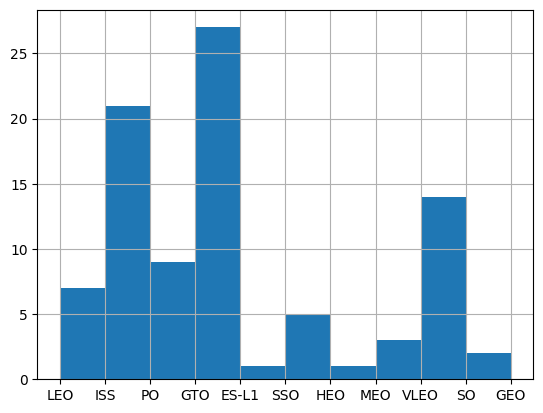

In [31]:
df['Orbit'].hist()

In [36]:
df_success=df[df['Class']==1]
df_fail=df[df['Class']!=1]
df_success.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64

In [37]:
df_success['Orbit'].value_counts()

GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: Orbit, dtype: int64

In [40]:
df_success['LaunchSite'].value_counts()

CCAFS SLC 40    33
KSC LC 39A      17
VAFB SLC 4E     10
Name: LaunchSite, dtype: int64

In [41]:
df_success['Outcome'].value_counts()

True ASDS     41
True RTLS     14
True Ocean     5
Name: Outcome, dtype: int64

In [42]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [43]:
df['Block'].value_counts()


5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64

In [44]:
df['ReusedCount'].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

در این قسمت ستون های اضافی که یا معادلش یا ضریبی از اون در جدول بوده رو حذف میکنیم

In [48]:
df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


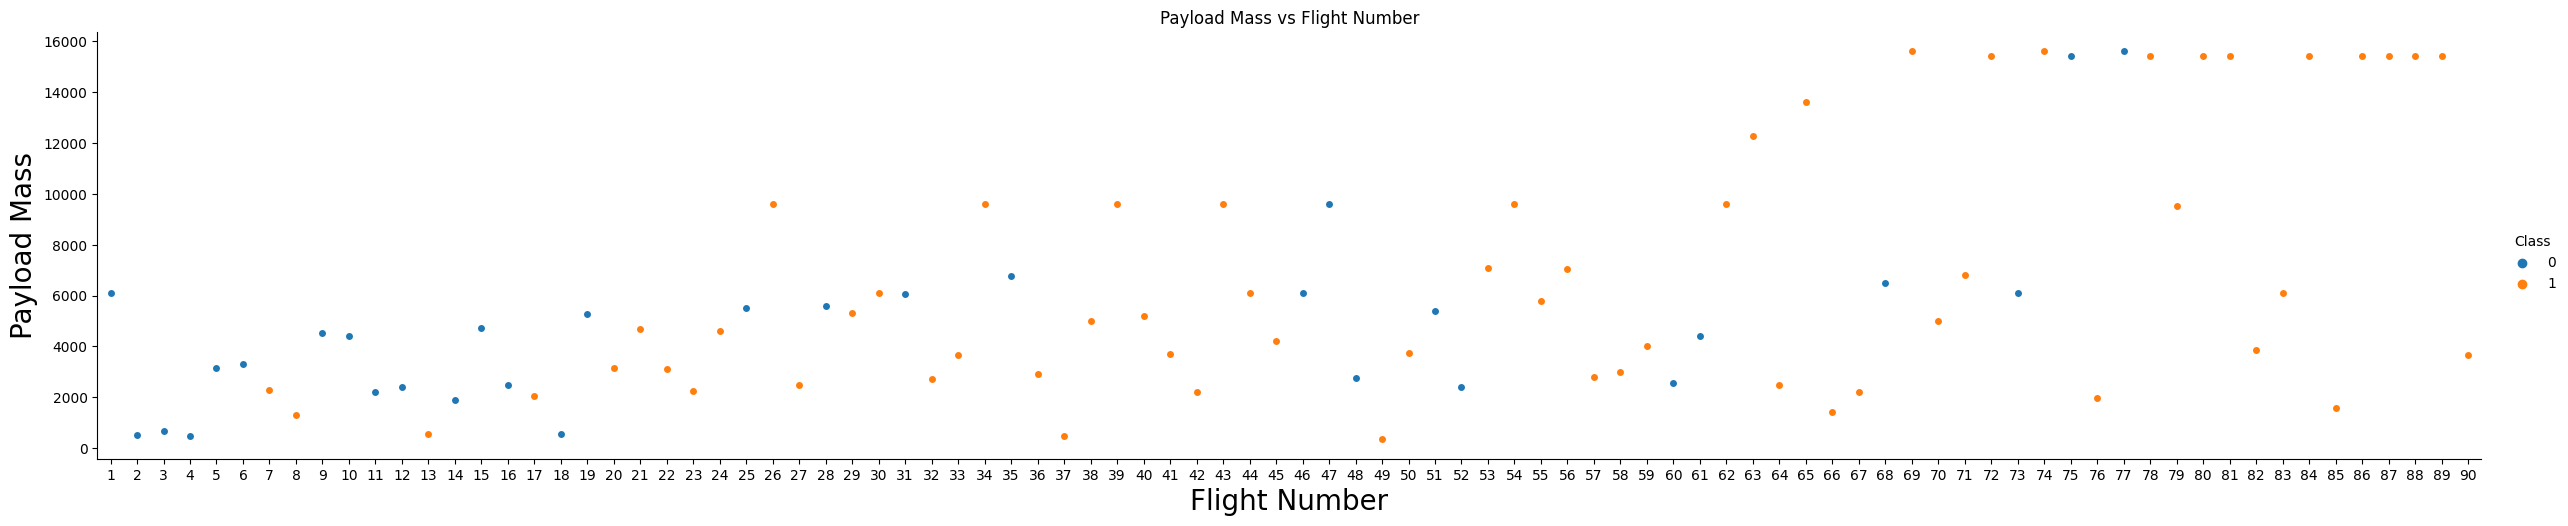

In [55]:
sns.catplot(y='PayloadMass',x='FlightNumber',hue='Class',data=df,aspect=5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Payload Mass',fontsize=20)
plt.title('Payload Mass vs Flight Number')
plt.show()

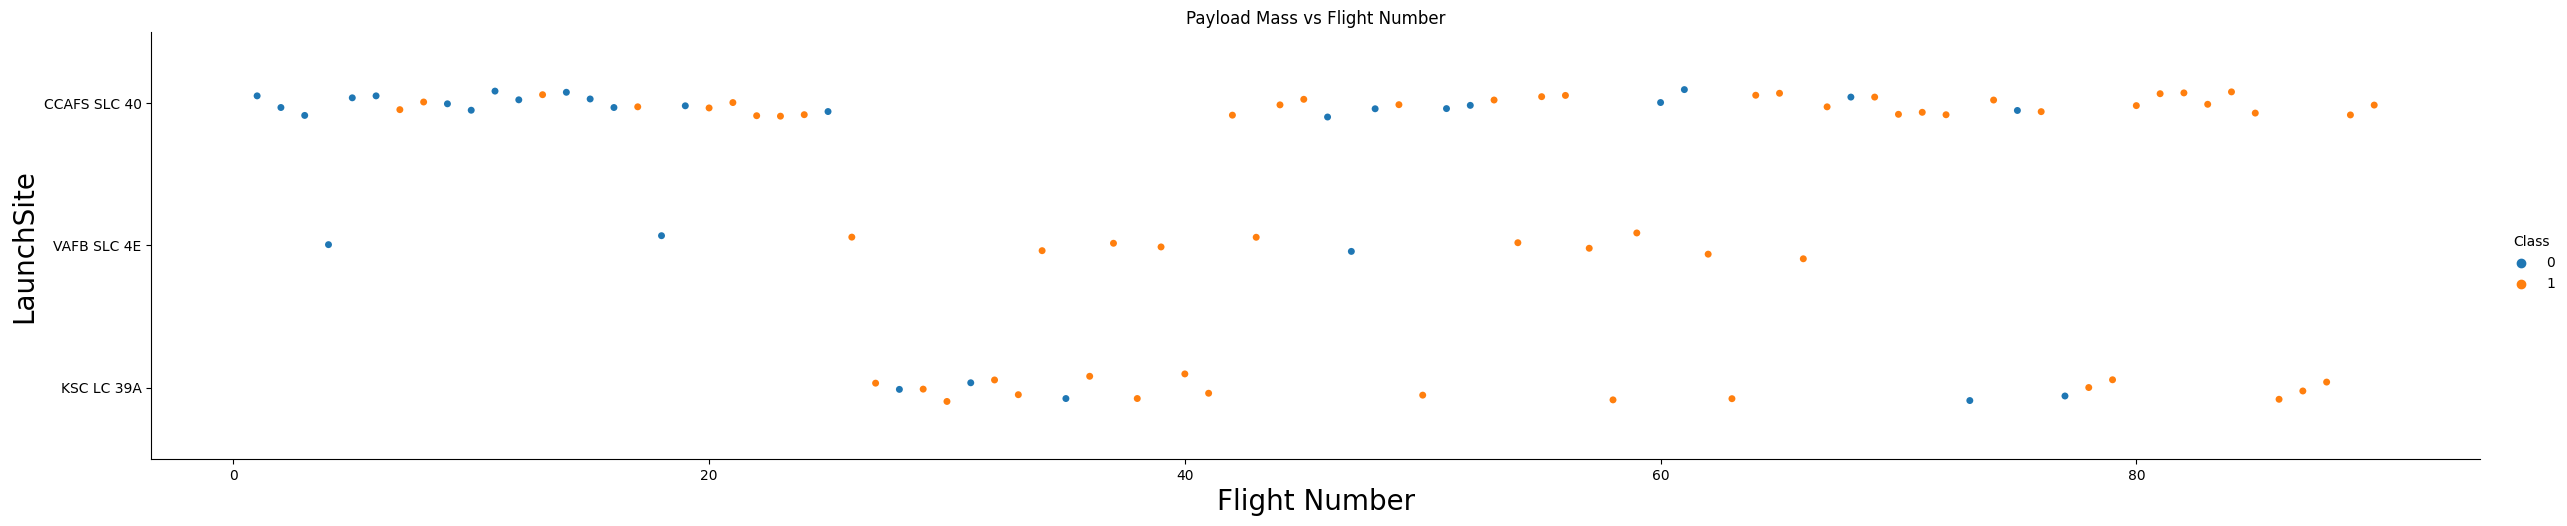

In [57]:
sns.catplot(y='LaunchSite',x='FlightNumber',hue='Class',data=df,aspect=5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('LaunchSite',fontsize=20)
plt.title('Payload Mass vs Flight Number')
plt.show()

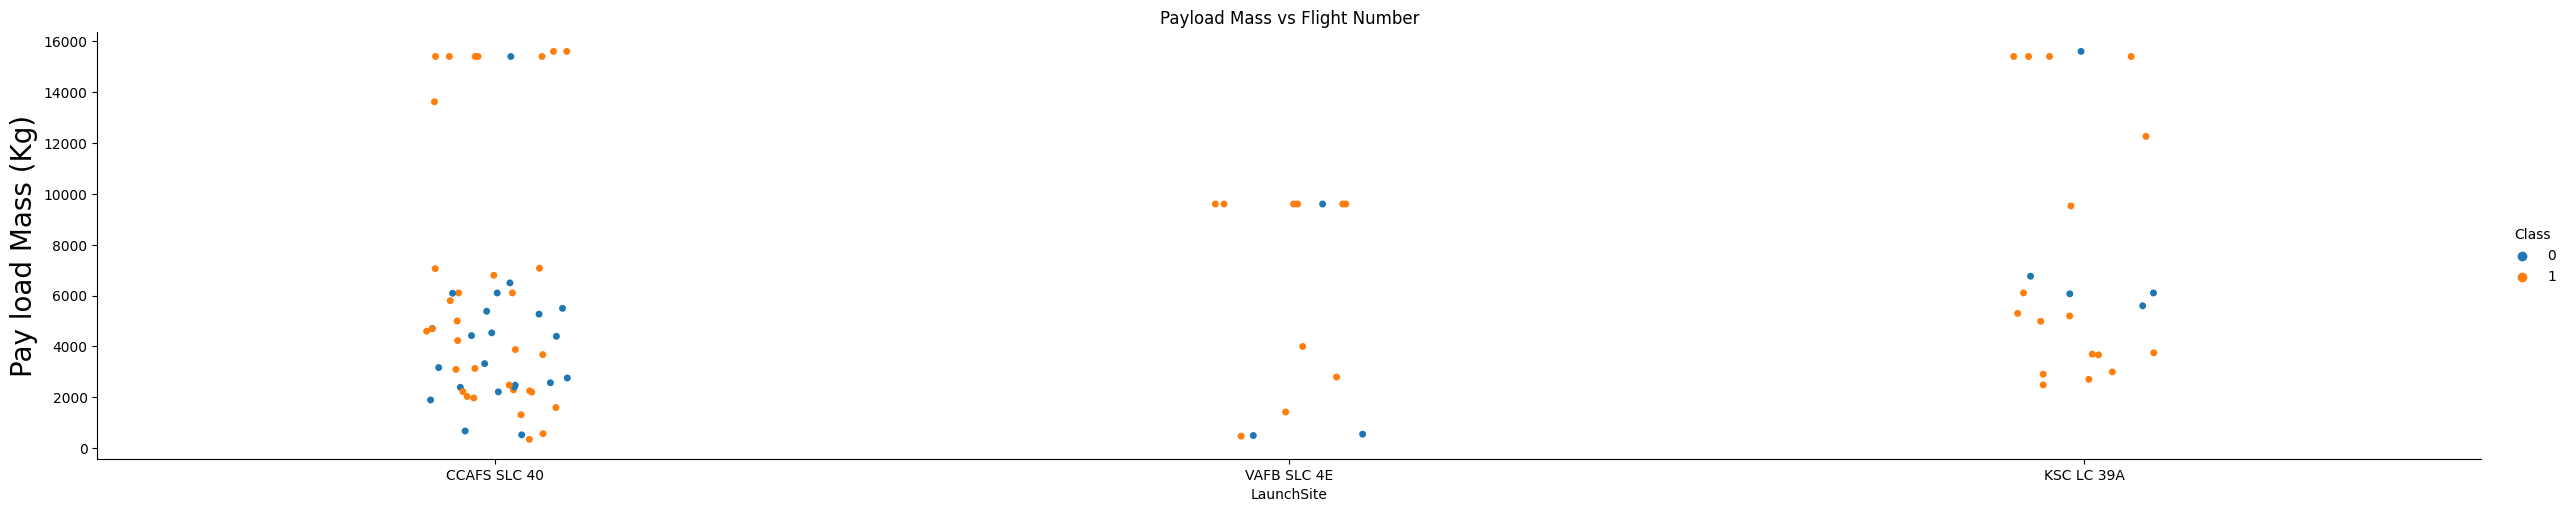

In [62]:
sns.catplot(y='PayloadMass',x='LaunchSite',hue='Class',data=df,aspect=5)
plt.ylabel('Pay load Mass (Kg)',fontsize=20)
plt.title('Payload Mass vs Flight Number')
plt.show()

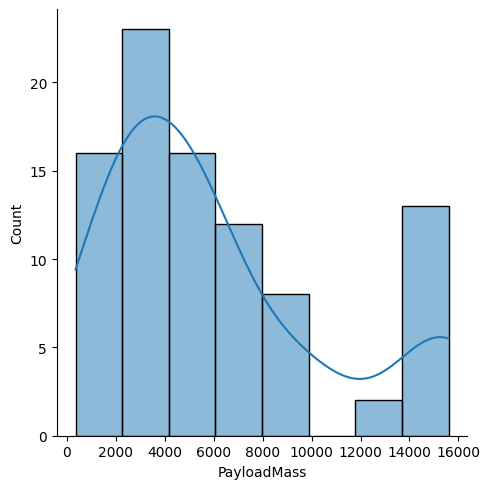

In [68]:
sns.displot(df['PayloadMass'],kde=True)